## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |
|Rodolfo Simões        |2215080073 |

### Tarefa de aprendizado - Gradient Boosting

### Gradient Boosting

O algoritmo Gradient Boosting é uma técnica de aprendizado de máquina para problemas de regressão e classificação que produz um modelo de previsão a partir de uma combinação de modelos de previsão fracos, geralmente árvores de decisão.

O objetivo do algoritmo é criar uma corrente de modelos fracos, onde cada um tem como objetivo minimizar o erro do modelo anterior, por meio de uma função de perda.

Aos ajustes de cada modelo fraco é multiplicado um valor chamado de taxa de aprendizagem. Esse valor, tem como objetivo determinar o impacto de cada árvore no modelo final. Quanto menor o valor, menor a contribuição de cada árvore.

Nesta primeira parte, será construído o modelo de Gradient Boosting utilizando uma técnica de divisão de dados fixa na proporção de 70/30. Além disso, faremos a implementação desse modelo com e sem a técnica de early stopping, que auxilia na análise do aprendizado do modelo e interrompe ao perceber que o mesmo chegou em um estágio sem melhorias.

In [1]:
# Bibliotecas
import os
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, log_loss, roc_auc_score


##### Sem early stopping

In [2]:
# Utilizando os dados codificados
df = pd.read_csv('datasets/updated_pollution_dataset_encoded.csv')

In [3]:
# Separando o atributo alvo dos preditores
X = df.drop('Air Quality Encoded', axis=1)
y = df['Air Quality Encoded']

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Definindo o modelo e seus hiperparâmetros
clf = GradientBoostingClassifier(n_estimators=200, 
                                learning_rate=0.05, 
                                max_depth=3,
                                min_samples_split= 5,
                                min_samples_leaf=5,
                                subsample= 0.8,
                                random_state=42)

In [6]:
# Treinando o modelo com dados de treino
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=200,
                           random_state=42, subsample=0.8)

In [7]:
y_pred_gb = clf.predict(X_test)
# print(y_pred_gb)

In [8]:
y_pred_gb = clf.predict(X_test)
acuracia_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
precisao_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
print(f"Métricas \nAcurácia: {acuracia_gb:.2f} \nF1-score: {f1_gb:.2f} \nPrecisão: {precisao_gb:.2f} \nRecall: {recall_gb:.2f}")

Métricas 
Acurácia: 0.96 
F1-score: 0.93 
Precisão: 0.94 
Recall: 0.93


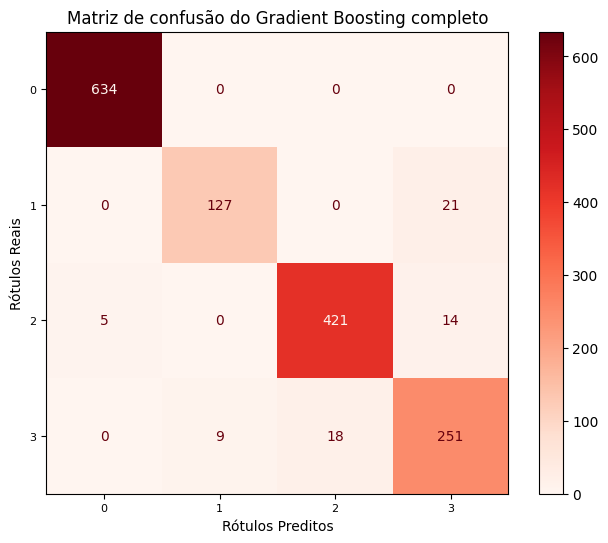

In [9]:
# Matriz de confusão
fig, ax = plt.subplots(figsize = (8, 6))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, ax = ax, cmap='Reds')

ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 8)
plt.title("Matriz de confusão do Gradient Boosting completo")
plt.show()

Sabendo que o objetivo deste modelo é aprimorar os resultados a cada passo, podemos analisar também a evolução da média de erros ao longo dos estágios da Gradient Boosting

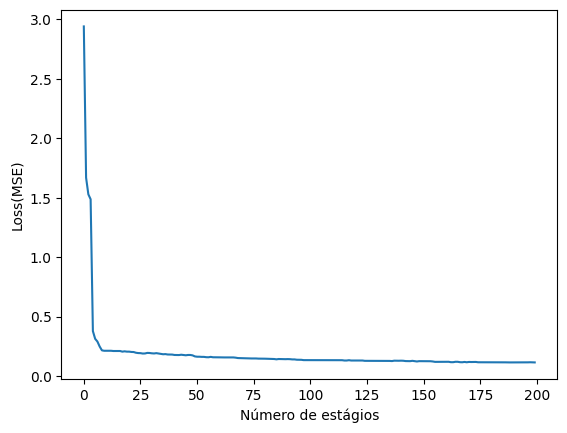

In [10]:
residuos = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]

plt.plot(residuos)
plt.ylabel('Loss(MSE)')
plt.xlabel('Número de estágios')
plt.show()

##### Com early stopping

Iterações necessárias:  117

Métricas 
Acurácia: 0.96 
F1-score: 0.93 
Precisão: 0.94 
Recall: 0.93


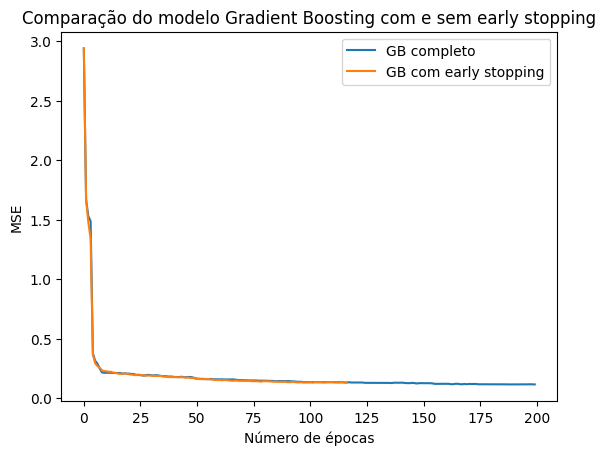

In [11]:

clf_early_stopping = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=5,
    subsample= 0.8,
    validation_fraction=0.1,  # Pega uma parte dos dados de treino usada para validação interna
    n_iter_no_change=10,      # Para se não houver melhoria após 10 iterações  
    tol= 0.001,               # Valor de tolerância
    random_state=42
)

clf_early_stopping.fit(X_train, y_train)

y_pred_earlystopping = clf.predict(X_test)
print("Iterações necessárias: ", clf_early_stopping.n_estimators_)

acuracia_es = accuracy_score(y_test, y_pred_earlystopping)
f1_es = f1_score(y_test, y_pred_earlystopping, average='macro')
precisao_es = precision_score(y_test, y_pred_earlystopping, average='macro')
recall_es = recall_score(y_test, y_pred_earlystopping, average='macro')


print(f"\nMétricas \nAcurácia: {acuracia_es:.2f} \nF1-score: {f1_es:.2f} \nPrecisão: {precisao_es:.2f} \nRecall: {recall_es:.2f}")

residuos_es = [mean_squared_error(y_test, y_pred_earlystopping) for y_pred_earlystopping in clf_early_stopping.staged_predict(X_test)]

plt.plot(residuos, label="GB completo")
plt.plot(residuos_es, label="GB com early stopping")
plt.ylabel('MSE')
plt.xlabel('Número de épocas')
plt.legend()
plt.title("Comparação do modelo Gradient Boosting com e sem early stopping")
plt.show()

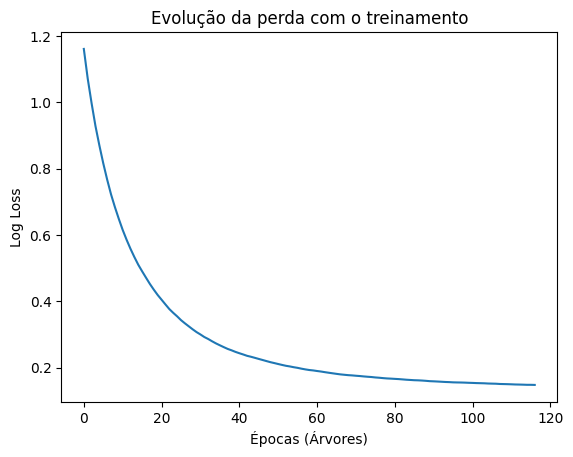

In [12]:
losses = []
for y_pred in clf_early_stopping.staged_predict_proba(X_test):
    losses.append(log_loss(y_test, y_pred))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Épocas (Árvores)")
plt.ylabel("Log Loss")
plt.title("Evolução da perda com o treinamento")
plt.show()

### Gradient Boosting com validação cruzada

A validação cruzada consiste em dividir o conjunto de dados em K partes (ou folds) e, a cada iteração, usa-se K-1 folds para o treino do modelo e o K restante, para o teste. Essa técnica permite que todos os dados sejam usados tanto para treino quanto para validação, buscando garantir uma validação mais robusta e menos enviesada.

In [13]:
# Definindo o número de folds utilizado
num_folds = 5

In [14]:
metricas_desejadas = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [15]:
modelo_kfold = GradientBoostingClassifier(n_estimators=100, 
                                learning_rate=0.1, 
                                max_depth=3,
                                min_samples_split= 5,
                                min_samples_leaf=5,
                                subsample= 0.8,
                                random_state=42)

In [16]:
# A função cross_validate realiza o treino e o teste do modelo
resultados_validacaocruzada = cross_validate(modelo_kfold, X, y, scoring=metricas_desejadas, cv=num_folds)

acuracia_kfold = resultados_validacaocruzada['test_accuracy'].mean()
precisao_kfold= resultados_validacaocruzada['test_precision_macro'].mean()
f1_kfold = resultados_validacaocruzada['test_f1_macro'].mean()
recall_kfold = resultados_validacaocruzada['test_recall_macro'].mean()

print("Métricas\n")
print(f"Acurácia: {acuracia_kfold:.2f} \nPrecisão: {precisao_kfold:.2f} \nRecall: {recall_kfold:.2f} \nF1-score: {f1_kfold:.2f}")

Métricas

Acurácia: 0.95 
Precisão: 0.94 
Recall: 0.93 
F1-score: 0.93


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


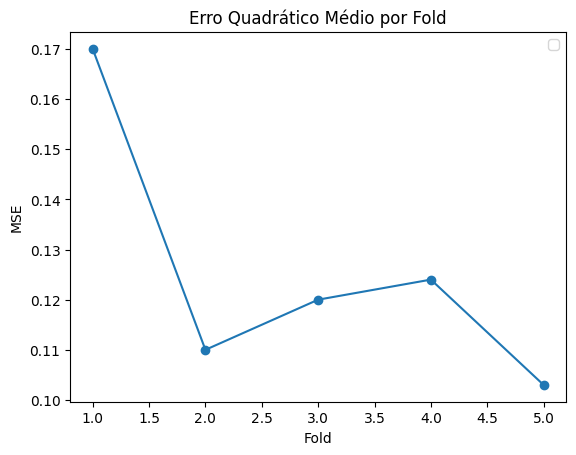

In [17]:
erro_quadrado_kfold = cross_validate(modelo_kfold, X, y, cv=5, scoring='neg_mean_squared_error')

mse_folds = -erro_quadrado_kfold['test_score']


plt.plot(range(1, 6), mse_folds, marker='o')
plt.title('Erro Quadrático Médio por Fold')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

### Gradient Boosting com GridSearch

A técnica de GridSearchCV realiza uma busca sobre um conjunto de parâmetros predefinidos afim de evitar a arbitrariedade em um único modelo. Utilizá-la ao implementar um algoritmo de Gradient Boosting permite que tenhamos uma maior variedade de modelos para análise de sua eficiência de acordo com seus hiperparâmetros. Assim, nesta parte, faremos a implementação do GridSearch junto ao Gradient Boosting para explorarmos novos modelos e compararmos com os obtidos anteriormente.

In [ ]:
grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.05, 0.05],
    'min_samples_split': [1, 5, 10],
    'min_samples_leaf': [1, 5],
    'subsample': [0.8, 1]
 }


grid_search_gb = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 42),
                           param_grid = grid_gb,
                           cv = 5,
                           n_jobs = -1,
                           scoring = 'f1_macro',
                           verbose= 2)

grid_search_gb.fit(X_train, y_train)

In [19]:
print("Melhores parâmetros encontrados:", grid_search_gb.best_params_)
print(f"Melhor F1-score médio: {grid_search_gb.best_score_}")

Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Melhor F1-score médio: 0.9354861375807904


In [20]:
y_pred_gs = grid_search_gb.best_estimator_.predict(X_test)

acuracia_gs = accuracy_score(y_test, y_pred_gs)
precisao_gs = precision_score(y_test, y_pred_gs, average = 'macro') 
recall_gs = recall_score(y_test, y_pred_gs, average = 'macro')
f1_gs = f1_score(y_test, y_pred_gs, average = 'macro')

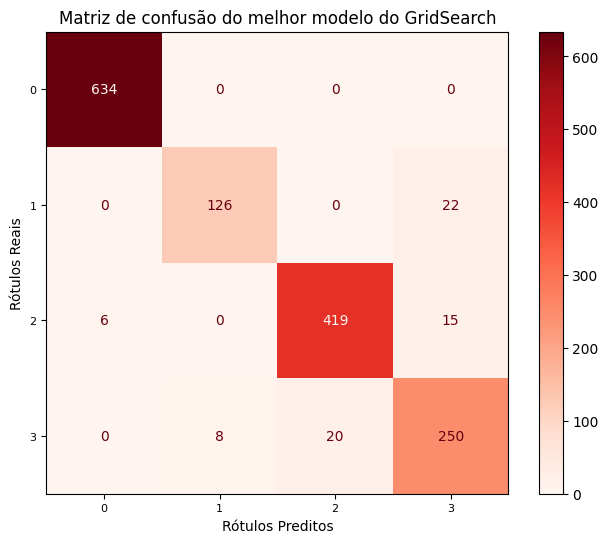

In [21]:
# Matriz de confusão
fig, ax = plt.subplots(figsize = (8, 6))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gs, ax = ax, cmap='Reds')

plt.title('Matriz de confusão do melhor modelo do GridSearch')
ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 8)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


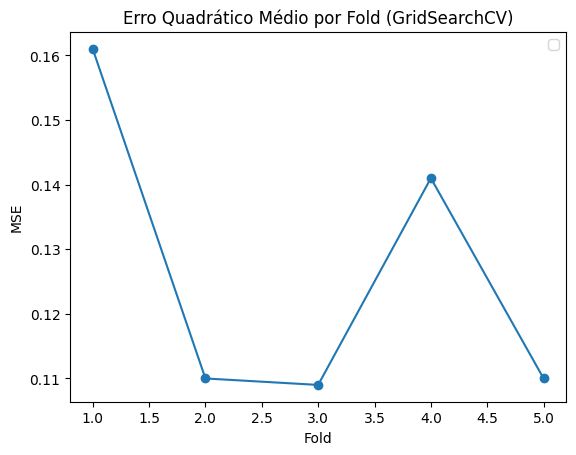

In [22]:
resultados_modelo_final = cross_validate(grid_search_gb.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')


mse_folds = -resultados_modelo_final['test_score']


plt.plot(range(1, 6), mse_folds, marker='o')
plt.title('Erro Quadrático Médio por Fold (GridSearchCV)')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

### XGBoost

O XGBoost consiste em uma versão otimizada do Gradient Boosting desenvolvido anteriormente. Ele é o aprimoramento desse modelo em aspectos como velocidade, desempenho e escalabilidade. Nesta parte, iremosdesenvolver um modelo de XGBoost para compará-lo com os modelos anteriores e ver se ele se adequa ao cenário deste projeto.

In [23]:
xboosting = XGBClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state= 42)

In [24]:
modelo_xgb = XGBClassifier(objective='multi:softprob', # Define o problema como multiclasse
                                num_class=4, # Número de classes
                                eval_metric='mlogloss', 
                                n_estimators=100,
                                learning_rate=0.1,
                                max_depth=3,
                                use_label_encoder=False,
                                
                                random_state=42)


C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [25]:
eval_set = [(X_train, y_train), (X_test, y_test)]
modelo_xgb.fit(X_train, y_train, eval_set= eval_set, verbose= False)

resultados_xgb = modelo_xgb.evals_result()


In [26]:
eval_set = [(X_train, y_train), (X_test, y_test)]
modelo_xgb.fit(X_train, y_train, eval_set= eval_set, verbose= False)

resultados_xgb = modelo_xgb.evals_result()

In [27]:
pred_xgb = modelo_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       634
           1       0.93      0.84      0.89       148
           2       0.94      0.96      0.95       440
           3       0.87      0.88      0.87       278

    accuracy                           0.95      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.95      0.95      0.95      1500



In [28]:
acuracia_xgb = accuracy_score(y_test, pred_xgb)
f1_xgb = f1_score(y_test, pred_xgb, average= 'macro')
recall_xgb = recall_score(y_test, pred_xgb, average= 'macro')
precisao_xgb = precision_score(y_test, pred_xgb, average= 'macro')

print("Métricas \n")
print(f"Acurácia: {acuracia_xgb:.2f} \nPrecisão: {precisao_xgb:.2f} \nRecall: {recall_xgb:.2f} \nF1-Score: {f1_xgb:.2f}")

Métricas 

Acurácia: 0.95 
Precisão: 0.94 
Recall: 0.92 
F1-Score: 0.93


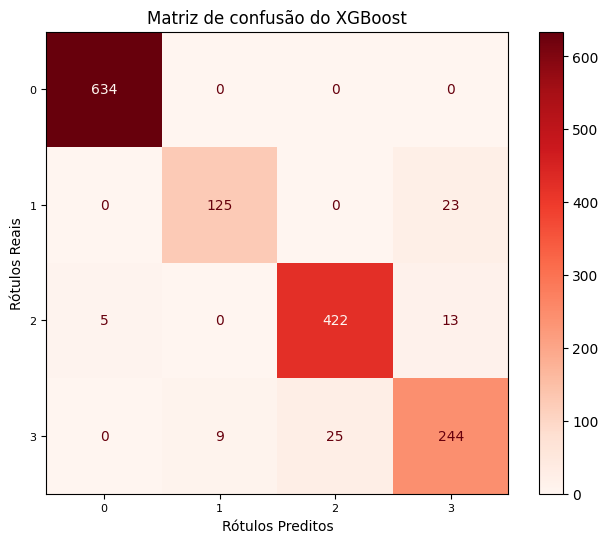

In [29]:
# Matriz de confusão
fig, ax = plt.subplots(figsize = (8, 6))

disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb, ax = ax, cmap='Reds')

plt.title('Matriz de confusão do XGBoost')
ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 8)

plt.show()

In [30]:
resultados_xgb['validation_0']['mlogloss']

[1.2354519012655532,
 1.11086304129873,
 1.0071180315528596,
 0.9174575556005751,
 0.838550321323531,
 0.7720472574404308,
 0.7107968994038446,
 0.65879207609381,
 0.6118853462338447,
 0.5715112777948379,
 0.5339503291930471,
 0.5010156221730369,
 0.4705691651361329,
 0.4440705307381494,
 0.4198413117698261,
 0.39693935700825284,
 0.37693366436873166,
 0.3580808519210134,
 0.340932292844568,
 0.3252660388137613,
 0.31102507727486745,
 0.2979911317761455,
 0.28585461741047247,
 0.2745952515772411,
 0.26427791774698667,
 0.2548599835421358,
 0.2456275706855314,
 0.23745095735575472,
 0.2292931646183133,
 0.22109836498435054,
 0.2140258154624275,
 0.20700275122267858,
 0.20110998097381422,
 0.19520432842629296,
 0.188867832036955,
 0.1841770298363907,
 0.17943259043725474,
 0.1744926970766059,
 0.17020133885794453,
 0.16581587522476912,
 0.16180469779138054,
 0.15806382764663016,
 0.15434043013996313,
 0.15118926676203098,
 0.14798002263504478,
 0.14461302585021726,
 0.14162230412369328,


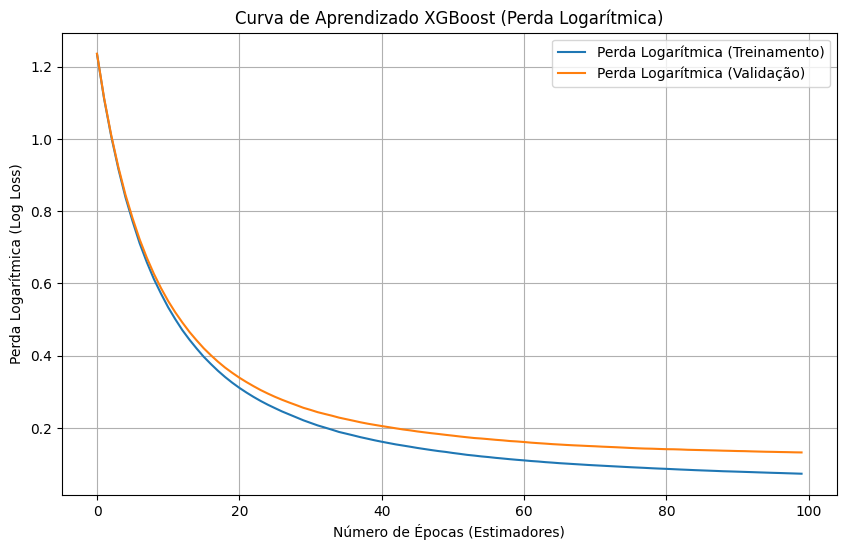

In [31]:

plt.figure(figsize=(10, 6))
plt.plot(range(0, 100), resultados_xgb['validation_0']['mlogloss'], label='Perda Logarítmica (Treinamento)')
plt.plot(range(0, 100), resultados_xgb['validation_1']['mlogloss'], label='Perda Logarítmica (Validação)')
plt.xlabel('Número de Épocas (Estimadores)')
plt.ylabel('Perda Logarítmica (Log Loss)')
plt.title('Curva de Aprendizado XGBoost (Perda Logarítmica)')
plt.grid(True)
plt.legend()
plt.show()

### RandomizedSearchCV

O modelo RandomizedSearchCV é bem similar ao modelo de GridSearchCV. Criamos um grid de possíveis configurações que o modelo deve testar, no entanto, apenas uma determinada quantidade deles (n_iter), escolhidos aleatoriamente, serão de fato implementados. O intuito é acrescentar ainda mais aleatoriedade para o modelo, tendo em vista que podemos ampliar o campo de possibilidades de parâmetros que serão amostrados.

In [32]:
parametros_rs = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [33]:
modelo_rs = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator= modelo_rs,
    param_distributions= parametros_rs,
    n_iter=10,
    cv= 5,
    n_jobs= -1,
    scoring= 'f1_macro',
    verbose=2
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026E0C9DC3A0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E16A1BA60>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_s...object at 0x0000026E16A57070>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E16A9B970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E16A18430>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026E16A79330>},
                   scoring='f1_macro', verbose=2)

In [34]:
print("Melhores parâmetros encontrados:", random_search.best_params_)
print(f"Melhor F1-score médio: {random_search.best_score_}")

Melhores parâmetros encontrados: {'learning_rate': 0.19390168791408022, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 156, 'subsample': 0.741955915902651}
Melhor F1-score médio: 0.9389496355671826


In [35]:

pred_rs = random_search.best_estimator_.predict(X_test)

# Métricas de avaliação no conjunto de teste
acuracia_rs = accuracy_score(y_test, pred_rs)
precisao_rs = precision_score(y_test, pred_rs, average = 'macro')
recall_rs = recall_score(y_test, pred_rs, average = 'macro')
f1_rs = f1_score(y_test, pred_rs, average = 'macro')


print("Métricas \n")
print(f"Acurácia: {acuracia_rs:.2f} \nPrecisão: {precisao_rs:.2f} \nRecall: {recall_rs:.2f} \nF1-Score: {f1_rs:.2f}")

Métricas 

Acurácia: 0.96 
Precisão: 0.94 
Recall: 0.93 
F1-Score: 0.93


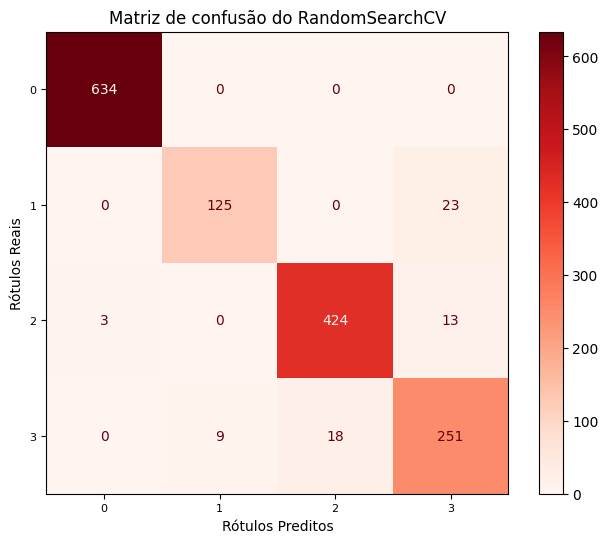

In [36]:
# Matriz de confusão
fig, ax = plt.subplots(figsize = (8, 6))

disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_rs, ax = ax, cmap='Reds')

plt.title('Matriz de confusão do RandomSearchCV')
ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 8)

plt.show()

In [37]:
os.makedirs('gradient_boosting', exist_ok = True)
joblib.dump(clf, 'gradient_boosting/gradientboosting_air_quality_standard.joblib')
joblib.dump(grid_search_gb.best_estimator_, 'gradient_boosting/final_model_gridsearch.joblib')
joblib.dump(resultados_validacaocruzada, 'gradient_boosting/crossvalidate_results.joblib')
joblib.dump(modelo_xgb, 'gradient_boosting/xgboost.joblib')
joblib.dump(random_search.best_estimator_, 'gradient_boosting/final_model_random_search.joblib')

['gradient_boosting/final_model_random_search.joblib']

### Conclusão

In [40]:
data = {
    'Modelo': ['Gradient Boosting Padrão', 'Melhor modelo do GridSearch', 'XGBoost', 'Melhor modelo do RandomizedSearch'],
    'Acurácia': [acuracia_gb, acuracia_gs, acuracia_xgb, acuracia_rs],
    'Precisão': [precisao_gb, precisao_gs, precisao_xgb, precisao_rs],
    'Recall': [recall_gb, recall_gs, recall_xgb, recall_rs],
    'F1-Score': [f1_gb, f1_gs, f1_xgb, f1_rs]
}


df_resultados = pd.DataFrame(data)

colunas_metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
df_resultados[colunas_metricas] = df_resultados[colunas_metricas].applymap(lambda x: f"{x * 100:.2f}%")


print("\nComparação de Modelos\n")
print(df_resultados.to_string(index = False))


Comparação de Modelos

                           Modelo Acurácia Precisão Recall F1-Score
         Gradient Boosting Padrão   95.53%   94.07% 92.95%   93.46%
      Melhor modelo do GridSearch   95.27%   93.91% 92.57%   93.18%
                          XGBoost   95.00%   93.51% 92.03%   92.72%
Melhor modelo do RandomizedSearch   95.60%   94.05% 92.78%   93.35%


O objetivo deste notebook foi explorar o modelo de aprendizado máquinas Gradient Boosting e suas variações, além de ver como o mesmo atuaria sobre a base de dados escolhida para o trabalho. Avaliando as métricas levantas ao longo deste documento, podemos concluir que o modelo de Gradient Boosting com uso de RandomizedSearch obteve o melhor desempenho em métricas como f1-score macro e acurácia.

Dentre as hipóteses para justificar estes resultados, podemos citar a exploração em um espaço mais amplo que este modelo oferece, ao fazer combinações aleatórias dos hiperparâmetros que o modelo Gradient Boosting utiliza.
